In [10]:
#data analysis
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#preprocessing
from sklearn.preprocessing import LabelEncoder

In [11]:
df = pd.read_csv("1_cleaned.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df.head()

,District,Price,m2_gross,m2_net,Number_of_rooms,Building_Age,Floor_location,Number_of_floors,Heating,Number_of_bathrooms,...,Garden,Top_floor,Garage_/_Shop_Top,Entrance_floor,Floor_Duplex,Private_Entry,Rerse_Duplex,Triplex,Ground_floor,Roof_Duplex
1,Tuzla,165000,50,40.0,1+1,5-10 between,5,11-15,Natural Gas (Combi),1,...,0,0,0,0,0,0,0,0,0,0
2,Fatih,207000,42,42.0,1+1,31 and more than,Ground floor,3,Underfloor heating,1,...,0,0,0,0,0,0,0,0,0,0
3,Çekmeköy,153000,55,45.0,1+1,1,Kot 1,7,Natural Gas (Combi),1,...,0,0,0,0,0,0,0,0,0,0
4,Çekmeköy,205000,62,46.0,1+1,0,High entrance,5,Natural Gas (Combi),1,...,0,0,0,0,0,0,0,0,0,0
5,Küçükçekmece,150000,70,55.0,1+1,5-10 between,Garden Floor,4,Natural Gas (Combi),1,...,0,0,0,0,0,0,0,0,0,0


### __Skew  Values__

__We will delete the skew values in district, number of rooms, floor location, number of floors, heating and number of bathrooms columns__

#### __District__

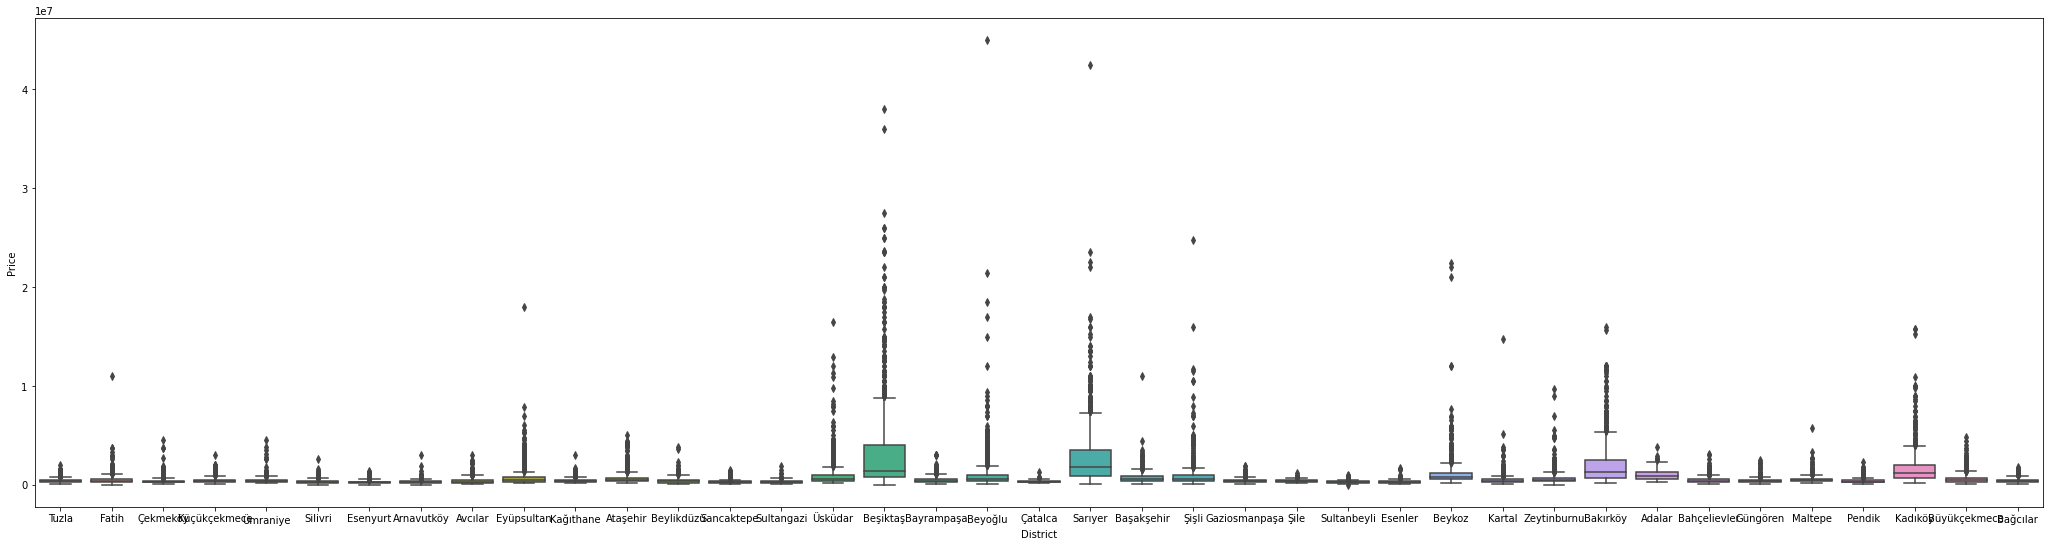

In [13]:
plt.figure(figsize=(36,9))
ax = sns.boxplot(data=df,x="District",y="Price");

In [14]:
df.District.value_counts().index

Index(['Fatih', 'Kartal', 'Çekmeköy', 'Gaziosmanpaşa', 'Bahçelievler',
       'Eyüpsultan', 'Sultangazi', 'Ataşehir', 'Bakırköy', 'Büyükçekmece',
       'Bağcılar', 'Avcılar', 'Beylikdüzü', 'Arnavutköy', 'Beşiktaş',
       'Sarıyer', 'Tuzla', 'Zeytinburnu', 'Şişli', 'Başakşehir', 'Güngören',
       'Bayrampaşa', 'Beyoğlu', 'Esenler', 'Kağıthane', 'Sancaktepe',
       'Esenyurt', 'Ümraniye', 'Silivri', 'Kadıköy', 'Maltepe', 'Sultanbeyli',
       'Küçükçekmece', 'Üsküdar', 'Pendik', 'Beykoz', 'Şile', 'Çatalca',
       'Adalar'],
      dtype='object')

In [15]:
rooms = df.District.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.District==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 3*IQR
    ust_sinir = Q3 + 3*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1) 

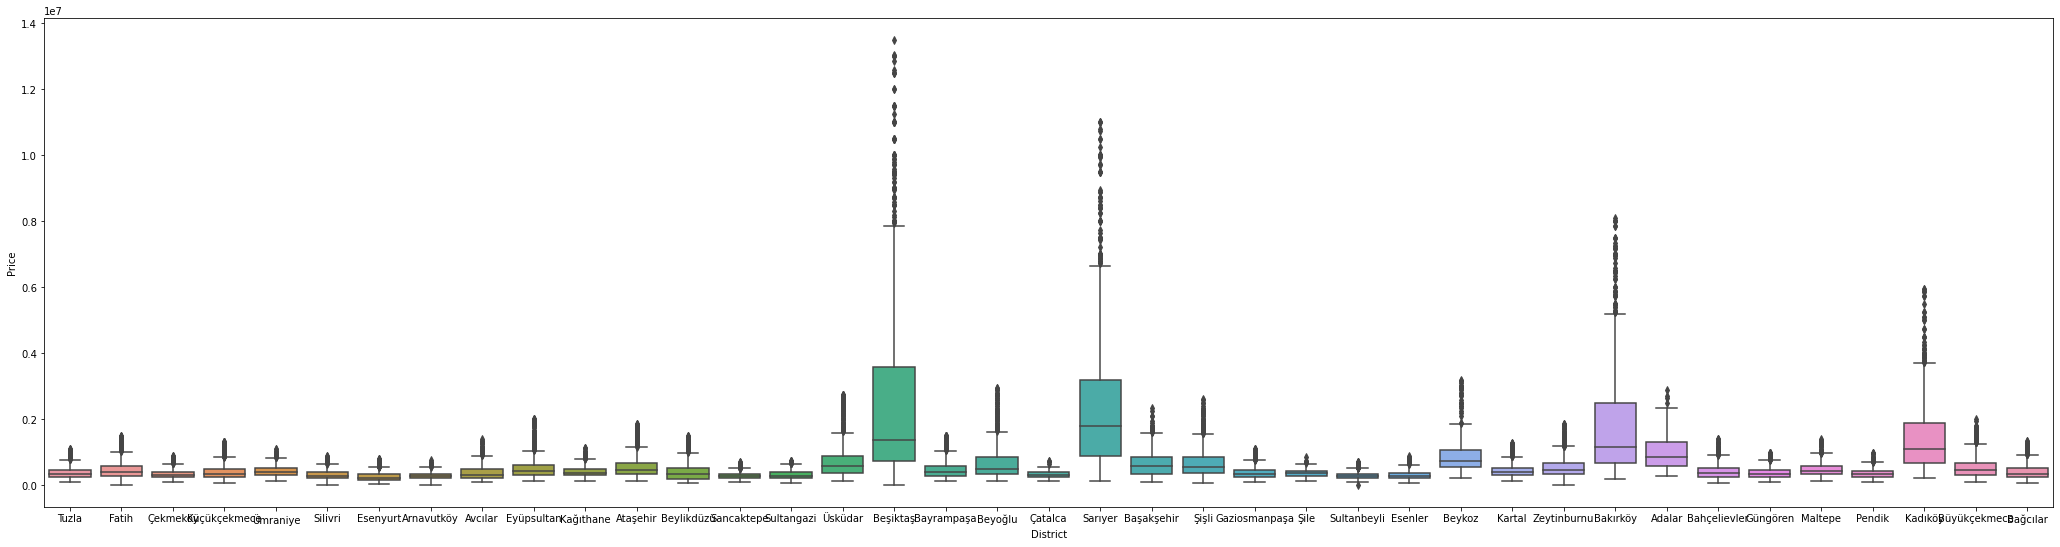

In [16]:
plt.figure(figsize=(36,9))
ax = sns.boxplot(data=df,x="District",y="Price");

#### __Number of rooms__

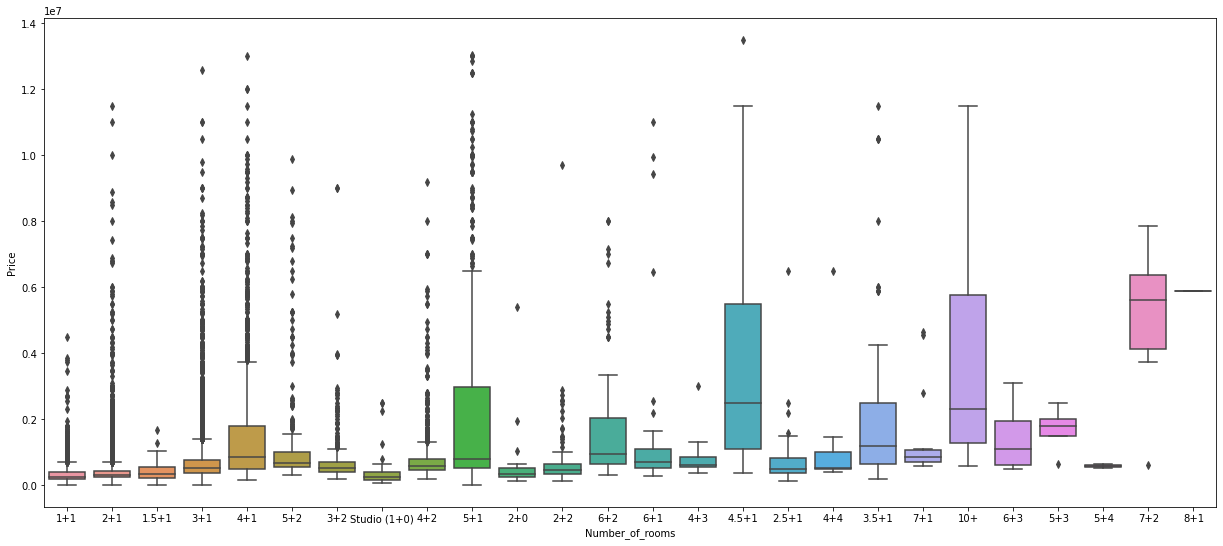

In [175]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_rooms",y="Price");

In [176]:
df.Number_of_rooms.value_counts().index

Index(['2+1', '3+1', '1+1', '4+1', '4+2', '3+2', '5+1', '5+2', '2+2',
       'Studio (1+0)', '3.5+1', '6+2', '1.5+1', '6+1', '2.5+1', '4.5+1', '4+3',
       '7+1', '2+0', '10+', '4+4', '7+2', '5+3', '6+3', '5+4', '8+1'],
      dtype='object')

In [177]:
rooms = df.Number_of_rooms.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.Number_of_rooms==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 3*IQR
    ust_sinir = Q3 + 3*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1)
    

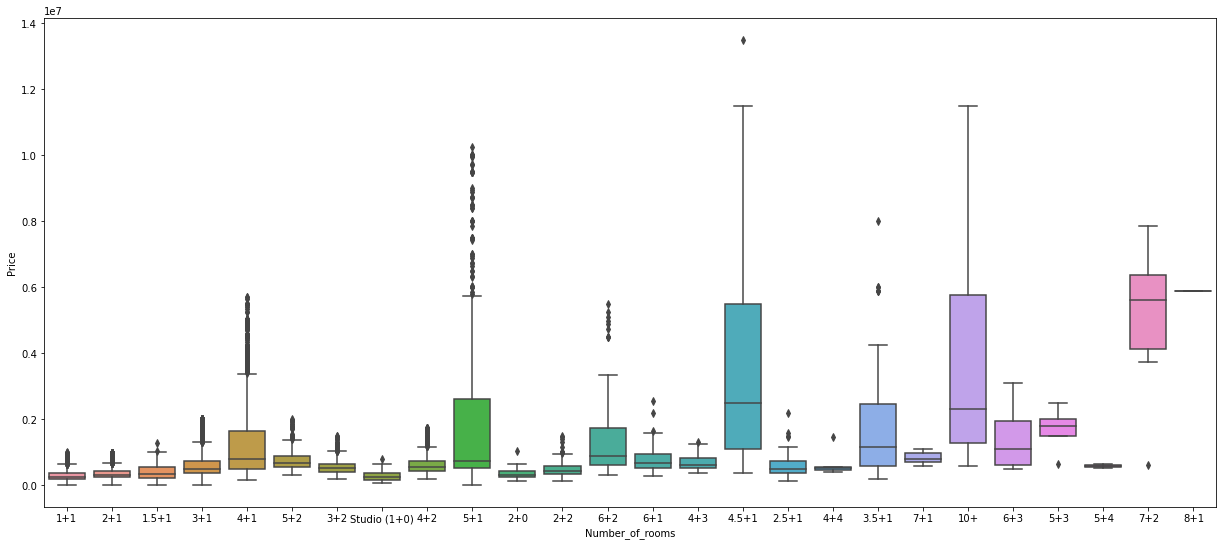

In [178]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_rooms",y="Price");

#### __Floor Location__

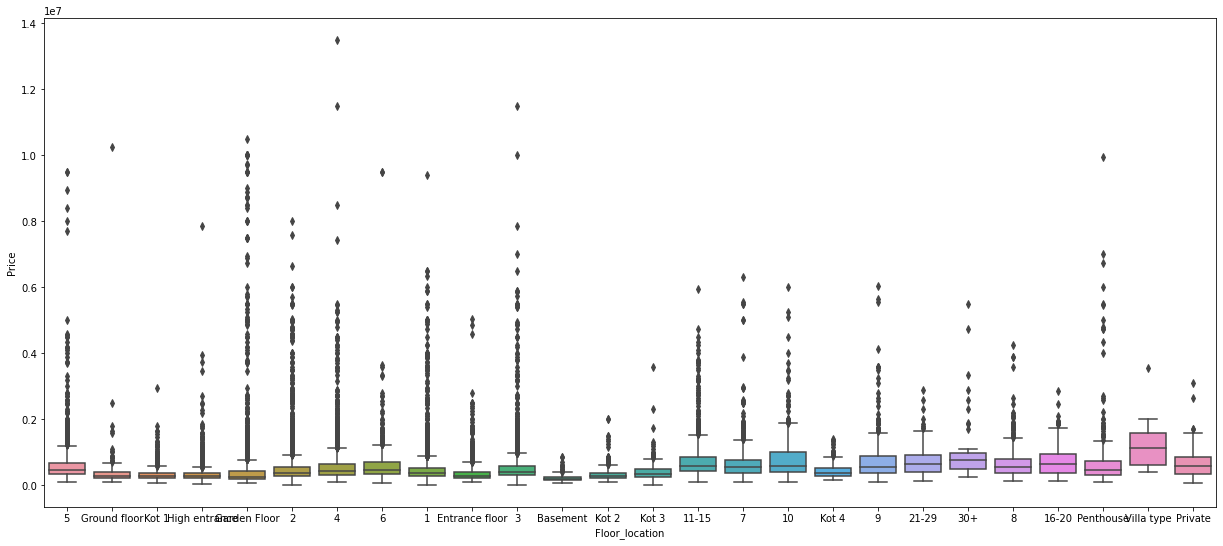

In [179]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Floor_location",y="Price");

In [180]:
df.Floor_location.value_counts().index

Index(['3', '2', '1', '4', 'High entrance', 'Garden Floor', '5',
       'Entrance floor', '11-15', '6', '7', '8', 'Kot 1', '9', '10',
       'Penthouse', 'Kot 2', 'Ground floor', 'Kot 3', 'Basement', '16-20',
       'Kot 4', '21-29', '30+', 'Villa type', 'Private'],
      dtype='object')

In [181]:
rooms = df.Floor_location.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.Floor_location==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 3*IQR
    ust_sinir = Q3 + 3*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1)
    

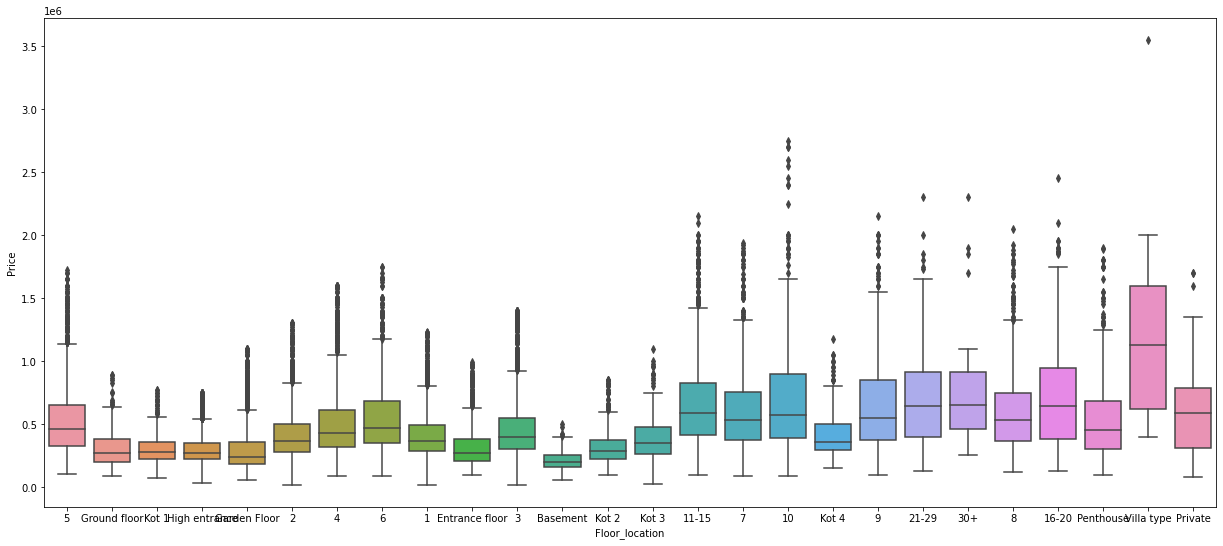

In [182]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Floor_location",y="Price");

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31295 entries, 1 to 31295
Columns: 176 entries, District to Roof_Duplex
dtypes: float64(1), int64(162), object(13)
memory usage: 43.3+ MB


#### __Number of Floors__

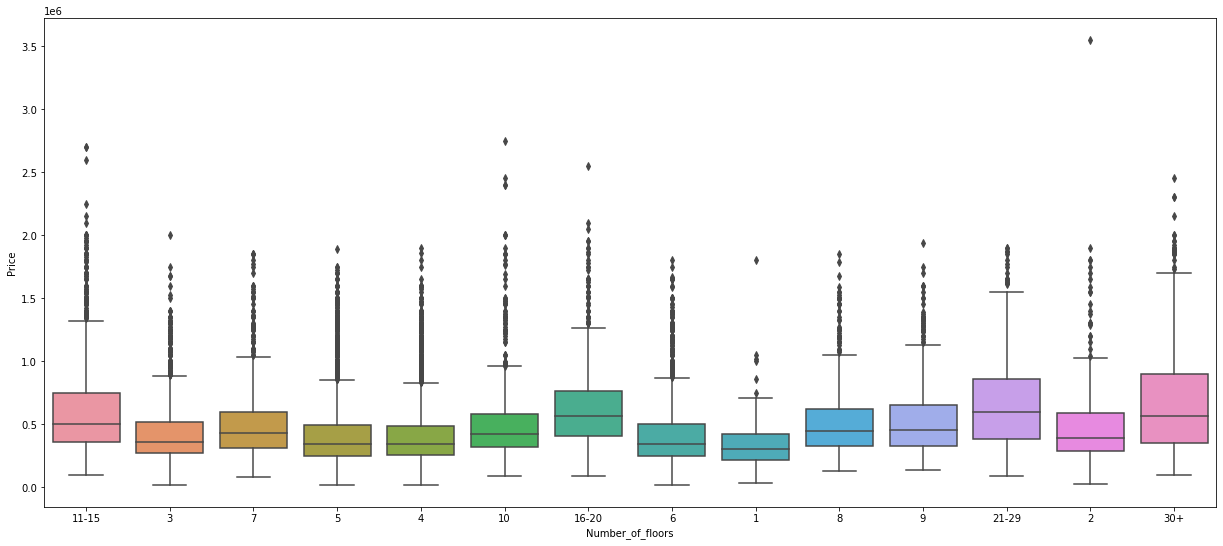

In [184]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_floors",y="Price");

In [185]:
df.Number_of_floors.value_counts().index

Index(['5', '4', '3', '6', '11-15', '7', '8', '10', '16-20', '9', '21-29',
       '30+', '2', '1'],
      dtype='object')

In [186]:
rooms = df.Number_of_floors.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.Number_of_floors==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 2*IQR
    ust_sinir = Q3 + 2*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1)
    

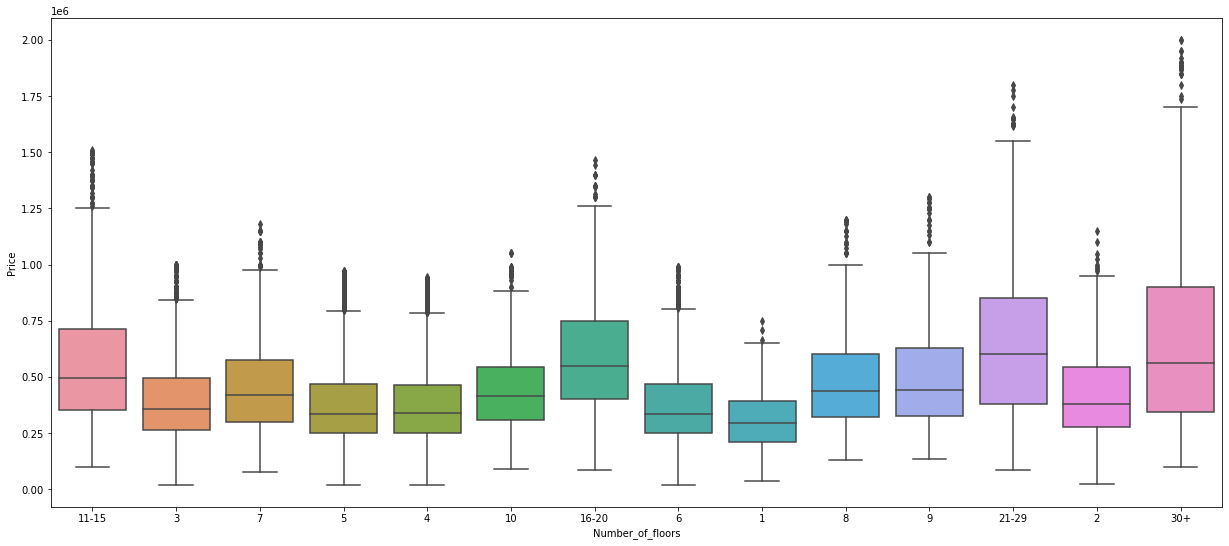

In [187]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_floors",y="Price");

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30293 entries, 1 to 30293
Columns: 176 entries, District to Roof_Duplex
dtypes: float64(1), int64(162), object(13)
memory usage: 41.9+ MB


#### __Heating__

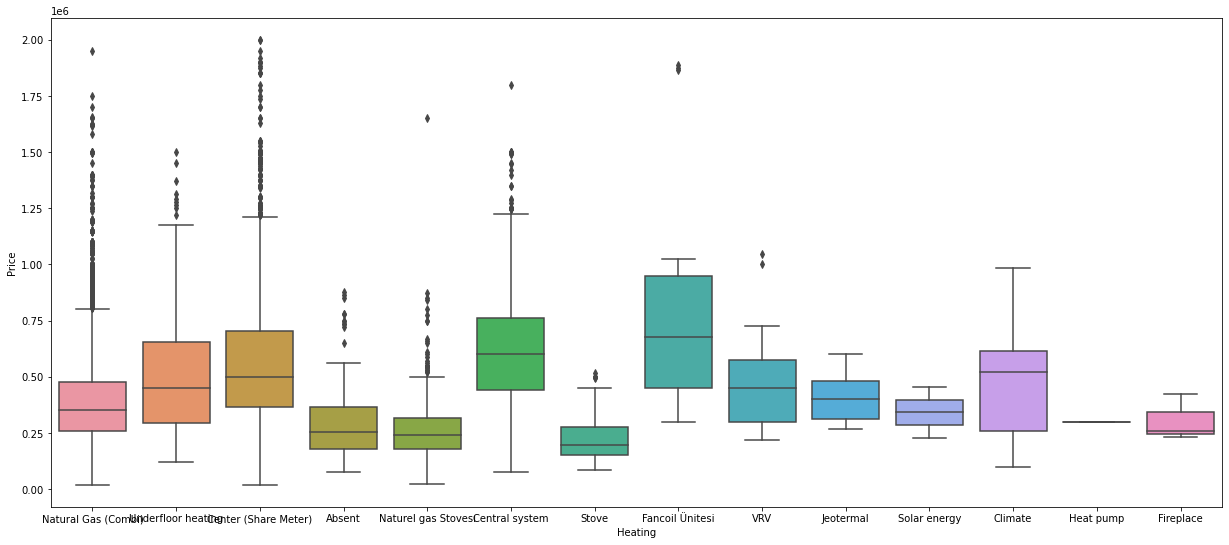

In [189]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Heating",y="Price");

In [190]:
df.Heating.value_counts().index

Index(['Natural Gas (Combi)', 'Center (Share Meter)', 'Central system',
       'Underfloor heating', 'Naturel gas Stovesı', 'Absent', 'Stove',
       'Climate', 'Fancoil Ünitesi', 'Jeotermal', 'VRV', 'Fireplace',
       'Solar energy', 'Heat pump'],
      dtype='object')

In [191]:
rooms = df.Heating.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.Heating==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 3*IQR
    ust_sinir = Q3 + 3*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1)
    

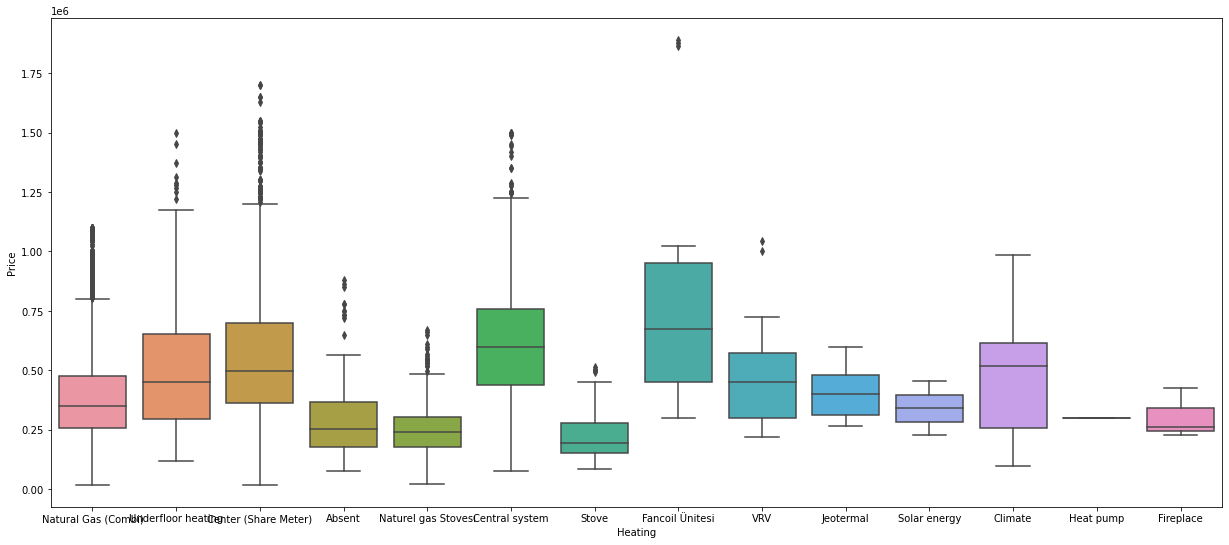

In [192]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Heating",y="Price");

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30187 entries, 1 to 30187
Columns: 176 entries, District to Roof_Duplex
dtypes: float64(1), int64(162), object(13)
memory usage: 41.8+ MB


#### __Number of Bathrooms__

In [194]:
df.Number_of_bathrooms.value_counts()

1    12487
1     7920
2     5195
2     3770
3      352
3      336
4       36
0       32
4       26
0       22
6        4
5        3
5        3
6        1
Name: Number_of_bathrooms, dtype: int64

In [195]:
df.loc[df.Number_of_bathrooms=="0","Number_of_bathrooms"] = 0
df.loc[df.Number_of_bathrooms=="1","Number_of_bathrooms"] = 1
df.loc[df.Number_of_bathrooms=="2","Number_of_bathrooms"] = 2
df.loc[df.Number_of_bathrooms=="3","Number_of_bathrooms"] = 3
df.loc[df.Number_of_bathrooms=="4","Number_of_bathrooms"] = 4
df.loc[df.Number_of_bathrooms=="5","Number_of_bathrooms"] = 5
df.loc[df.Number_of_bathrooms=="6","Number_of_bathrooms"] = 6

In [196]:
df.Number_of_bathrooms.value_counts()

1    20407
2     8965
3      688
4       62
0       54
5        6
6        5
Name: Number_of_bathrooms, dtype: int64

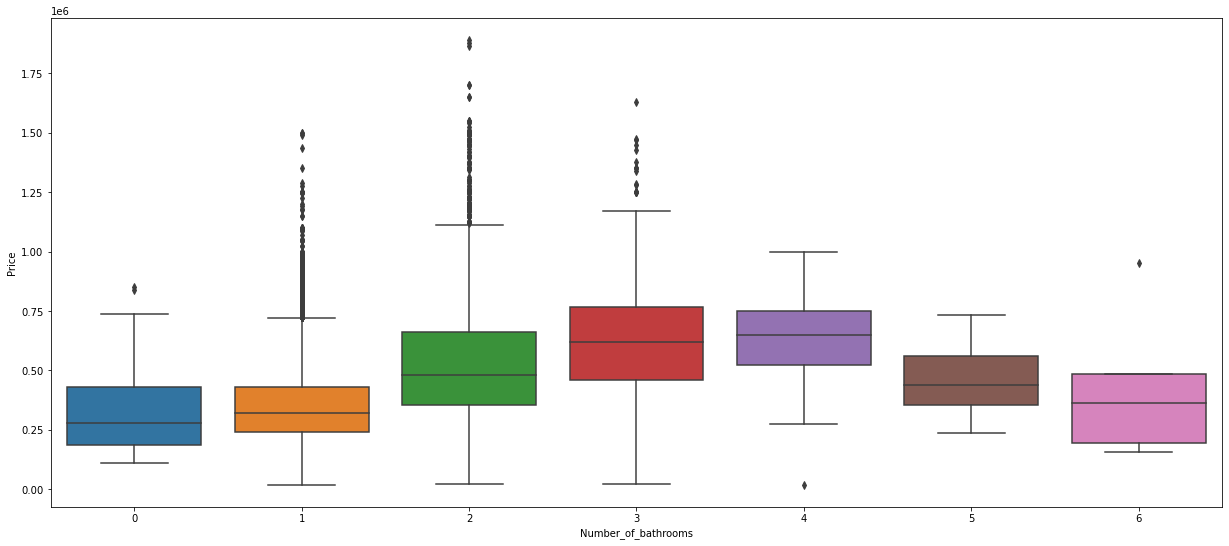

In [197]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_bathrooms",y="Price");

In [198]:
df.Number_of_bathrooms.value_counts().index

Int64Index([1, 2, 3, 4, 0, 5, 6], dtype='int64')

In [202]:
rooms = df.Number_of_bathrooms.value_counts().index
for i in range(len(rooms)):
    dy = df.loc[df.Number_of_bathrooms==str(rooms[i]) ,"Price"]
    Q1 = dy.quantile(0.25)
    Q3 = dy.quantile(0.75)
    IQR = Q3-Q1
    alt_sinir = Q1 - 2.5*IQR
    ust_sinir = Q3 + 2.5*IQR
    aykiri_dy = ((dy < alt_sinir) | (dy > ust_sinir))
    asd = dy[aykiri_dy].index
    for i in range(len(asd)):
        df.drop(asd[i],inplace=True)
df.index = np.arange(1,len(df)+1)
    

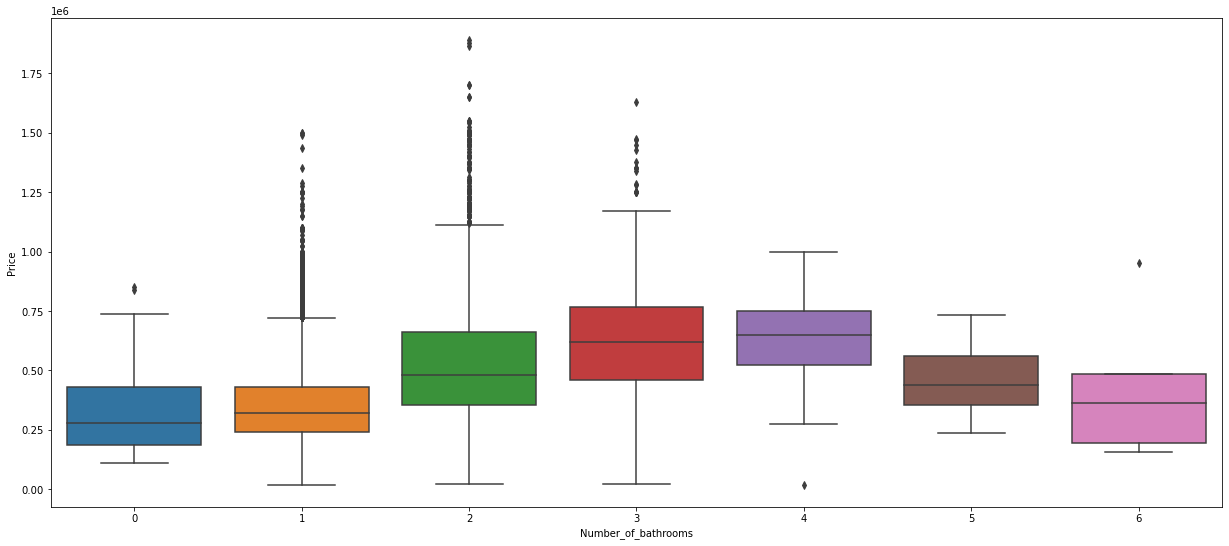

In [203]:
plt.figure(figsize=(21,9))
ax = sns.boxplot(data=df,x="Number_of_bathrooms",y="Price");

### __Missing Values__

__We will delete the missing values in data__

In [205]:
df.isnull().sum()

District            0
Price               0
m2_gross            0
m2_net             23
Number_of_rooms     0
                   ..
Private_Entry       0
Rerse_Duplex        0
Triplex             0
Ground_floor        0
Roof_Duplex         0
Length: 176, dtype: int64

In [206]:
df.dropna(inplace=True)

__There are 30164 observations in total__

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30164 entries, 1 to 30187
Columns: 176 entries, District to Roof_Duplex
dtypes: float64(1), int64(162), object(13)
memory usage: 40.7+ MB


### __Labelling__

In [209]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [210]:
df.select_dtypes(include="object").head()

,District,Number_of_rooms,Building_Age,Floor_location,Number_of_floors,Heating,Number_of_bathrooms,Balcony,Furnished,Using_status,Available_for_Loan,From_who,Swap
1,Tuzla,1+1,5-10 between,5,11-15,Natural Gas (Combi),1,Absent,Yes,Free,Yes,From owner,No
2,Fatih,1+1,31 and more than,Ground floor,3,Underfloor heating,1,Absent,No,Free,Yes,From bank,No
3,Çekmeköy,1+1,1,Kot 1,7,Natural Gas (Combi),1,Absent,No,Property owner,Yes,From owner,Yes
4,Çekmeköy,1+1,0,High entrance,5,Natural Gas (Combi),1,Absent,No,Property owner,Yes,From owner,Yes
5,Küçükçekmece,1+1,5-10 between,Garden Floor,4,Natural Gas (Combi),1,Absent,No,Property owner,Yes,From owner,No


In [211]:
df["District"] = lbe.fit_transform(df["District"])
df["Number_of_rooms"] = lbe.fit_transform(df["Number_of_rooms"])
df["Building_Age"] = lbe.fit_transform(df["Building_Age"])
df["Floor_location"] = lbe.fit_transform(df["Floor_location"])
df["Number_of_floors"] = lbe.fit_transform(df["Number_of_floors"])
df["Heating"] = lbe.fit_transform(df["Heating"])
df["Number_of_bathrooms"] = lbe.fit_transform(df["Number_of_bathrooms"])
df["Balcony"] = lbe.fit_transform(df["Balcony"])
df["Furnished"] = lbe.fit_transform(df["Furnished"])
df["Using_status"] = lbe.fit_transform(df["Using_status"])
df["Available_for_Loan"] = lbe.fit_transform(df["Available_for_Loan"])
df["From_who"] = lbe.fit_transform(df["From_who"])
df["Swap"] = lbe.fit_transform(df["Swap"])

### __One-Hot Encoder__

__We should do one-hot encoder o avoid from dummy variable trap__

In [212]:
df = pd.get_dummies(df,columns=["District","Number_of_rooms","Building_Age","Floor_location","Number_of_floors",
                              "Heating","Number_of_bathrooms","Using_status","From_who"])

In [213]:
df.head()

,Price,m2_gross,m2_net,Balcony,Furnished,Available_for_Loan,Swap,Front_West,Front_East,Front_South,...,Number_of_bathrooms_4,Number_of_bathrooms_5,Number_of_bathrooms_6,Using_status_0,Using_status_1,Using_status_2,From_who_0,From_who_1,From_who_2,From_who_3
1,165000,50,40.0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,207000,42,42.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,153000,55,45.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,205000,62,46.0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,150000,70,55.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [214]:
df.index = np.arange(1,len(df)+1)

In [215]:
df.to_csv("3_preprocessed.csv",index_label=False)